In [2]:

import cv2
from skimage.transform import resize
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
from utils.augmentation import MyAugmentation
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt


In [3]:
BATCH = 1
path_to_config = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Kod/config/config_lab.yaml'
with open(path_to_config, 'r') as config_file:
    config = yaml.safe_load(config_file)
model_path = config['save_model_path'] + '/mixedGT1_best_model'


annotator1 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'train',segment = 'intersection_and_union',annotator= 1)
train_GT1 = annotator1.train_loader

/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small


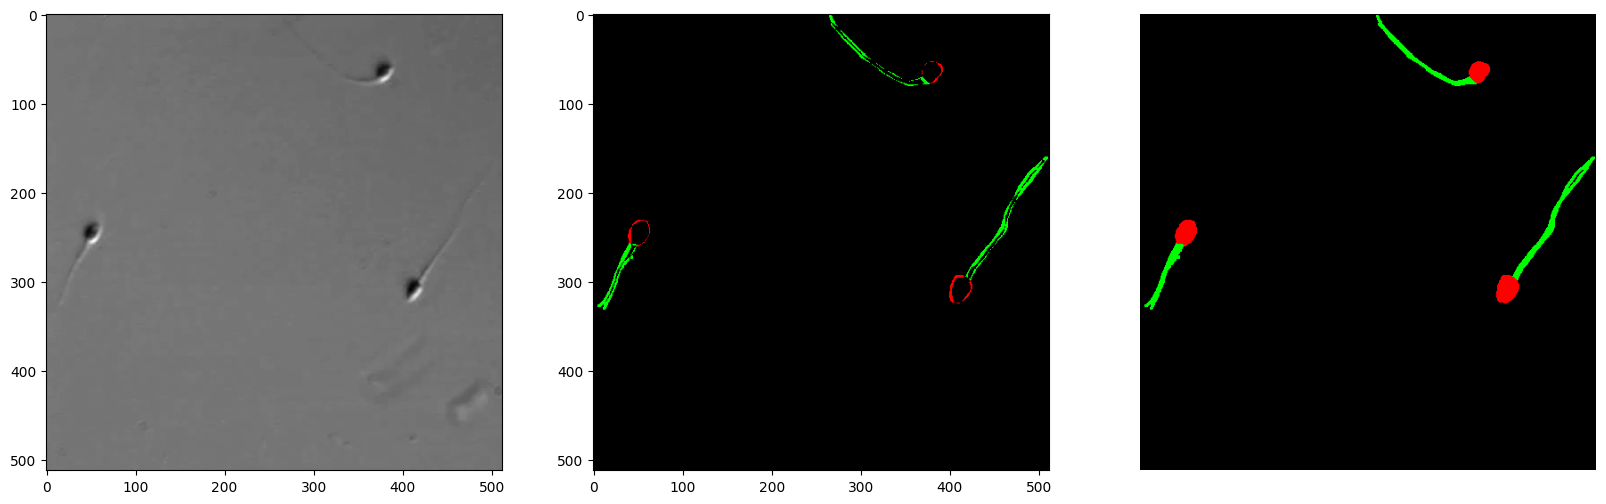

In [38]:
colors = [[0, 0, 0], [0, 255, 0], [255, 0, 0]]  # tło, wić, główka
# Utwórz obraz RGB z maski


for batch_idx, (inputs, intersections,unions) in enumerate(train_GT1):
    if batch_idx == 1:
        break
    for i in range(1):

        mask_to_display = intersections[i].numpy()
        intersection_rgb = np.zeros((mask_to_display.shape[0], mask_to_display.shape[1], 3), dtype=np.uint8)
        for j, color in enumerate(colors):
            intersection_rgb[mask_to_display == j] = color

        mask_to_display = unions[i].numpy()
        union_rgb = np.zeros((mask_to_display.shape[0], mask_to_display.shape[1], 3), dtype=np.uint8)
        for j, color in enumerate(colors):
            union_rgb[mask_to_display == j] = color

        plt.figure(figsize=(20, 20))
        plt.subplot(1,3,1)
        plt.imshow(inputs[i].permute(1,2,0))
        plt.subplot(1,3,2)
        plt.imshow(union_rgb - intersection_rgb)
        plt.subplot(1,3,3)
        plt.imshow(union_rgb)
        plt.axis('off')
        plt.show()



In [ ]:
import cv2

input = cv2.imread('/home/nitro/Studia/Praca Dyplomowa/noisy_labels/Dataset/SegSperm/train/GT1_full/0.png')
input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

Number = 350


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 512, 512])


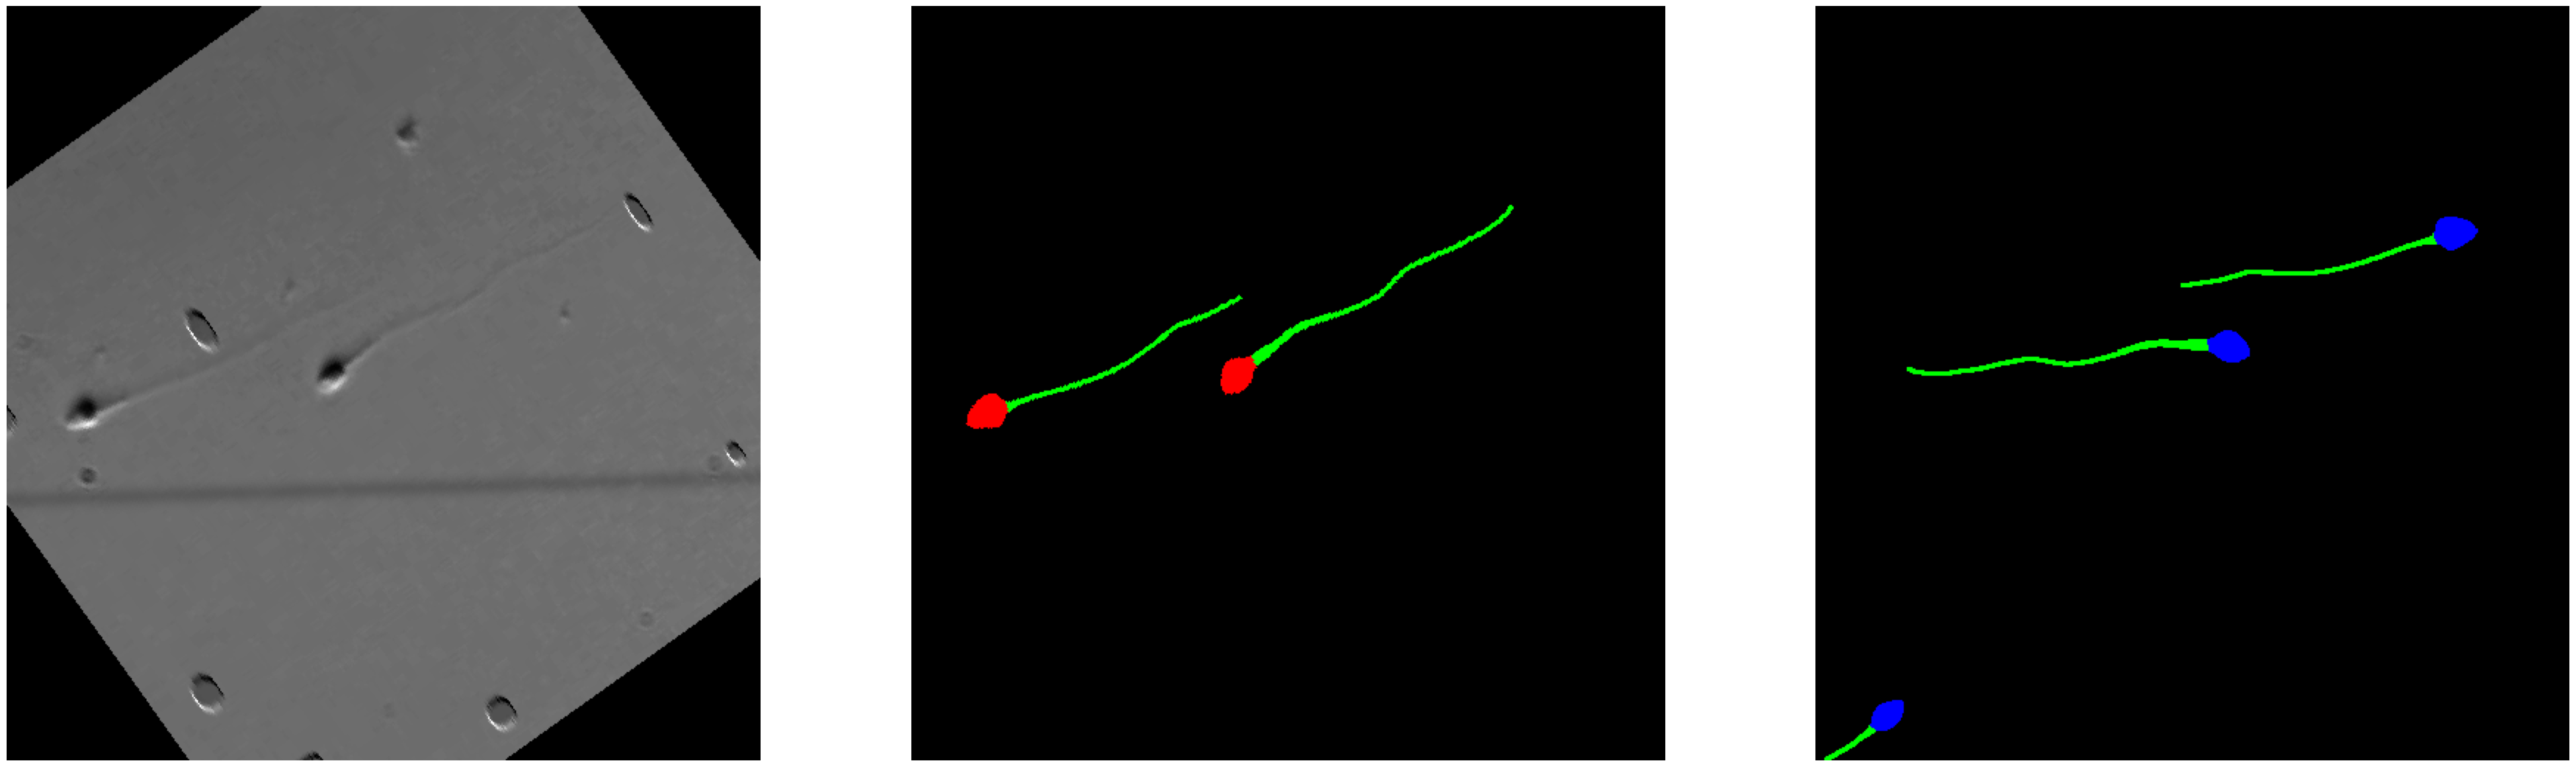

In [3]:
import cv2
from skimage.transform import resize
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
from utils.augmentation import MyAugmentation
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
import random

def rgb_to_class_id(mask_rgb, class_colors):
        mask_id = np.zeros(mask_rgb.shape[:2], dtype=np.float32)
        for class_id, color in enumerate(class_colors):
            mask_id[(mask_rgb == color).all(axis=2)] = class_id
        return mask_id

class_colors = [[0, 0, 0], [0, 255, 0], [0, 0, 255]]  # tło, wić, główka
number = random.randint(0, 431)
print(f'Number = {number}')

img = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/images/{number}.png')
x_img = img.astype(np.float32)
x_img = resize(x_img, (512, 512, 3), mode='constant', preserve_range=True)


        
# Load masks
mask = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/GT1_mixed/{number}.png')
mask = mask.astype(np.float32)
mask = resize(mask, (512, 512, 3), mode='constant', preserve_range=True)
mask_id = rgb_to_class_id(mask, class_colors)

hmask = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/GT1_head/{number}.png')
hmask = mask.astype(np.float32)
hmask = resize(hmask, (512, 512, 1), mode='constant', preserve_range=True)
#hmask_id = rgb_to_class_id(hmask, class_colors)
min_val = np.min(x_img)
max_val = np.max(x_img)
x_img = (x_img - min_val) / (max_val - min_val)


x_img = x_img.transpose(2, 0, 1)
x_img = torch.from_numpy(x_img)
mask_id = torch.from_numpy(mask_id)


augmentation = MyAugmentation()
x_img,mask_id = augmentation(x_img, mask_id)

mask_id1 = mask_id.squeeze(0).squeeze(0)
#mask_id = mask_id.permute(1,2,0)

print(mask_id.shape)

mask_to_display = mask_id1

colors = [[0, 0, 0], [0, 255, 0], [255, 0, 0]]  # tło, wić, główka

# Utwórz obraz RGB z maski
mask_rgb = np.zeros((mask_to_display.shape[0], mask_to_display.shape[1], 3), dtype=np.uint8)
for i, color in enumerate(colors):
    mask_rgb[mask_to_display == i] = color


plt.figure(figsize=(50, 50))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(x_img[0].permute(1,2,0))
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(mask_rgb)
#plt.imshow(mask_id)
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(mask)

plt.show()


Number = 61


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

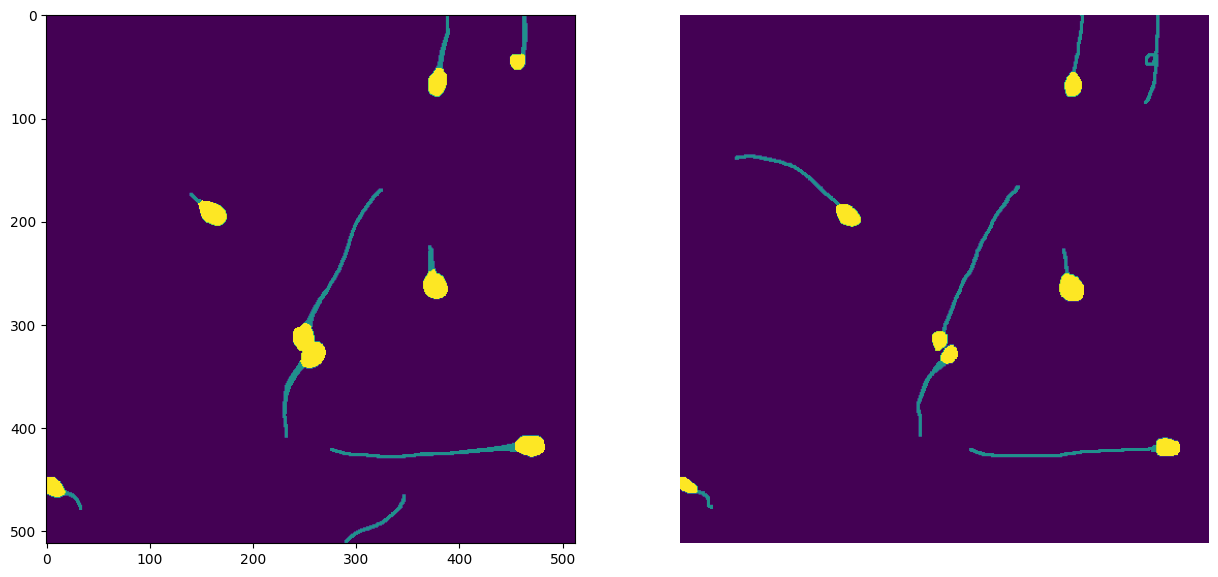

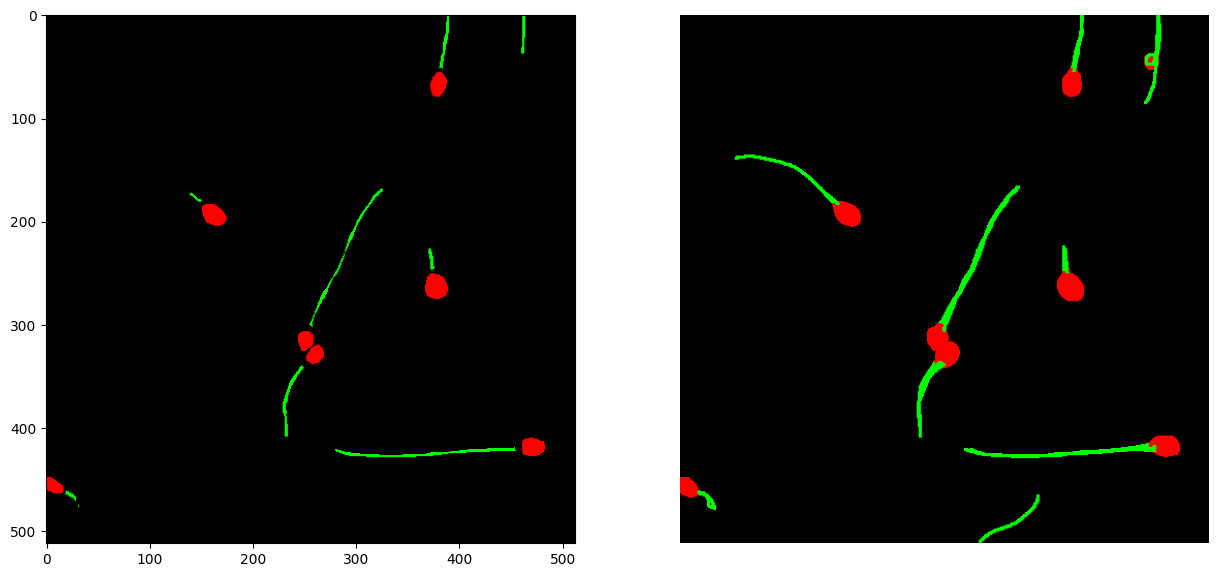

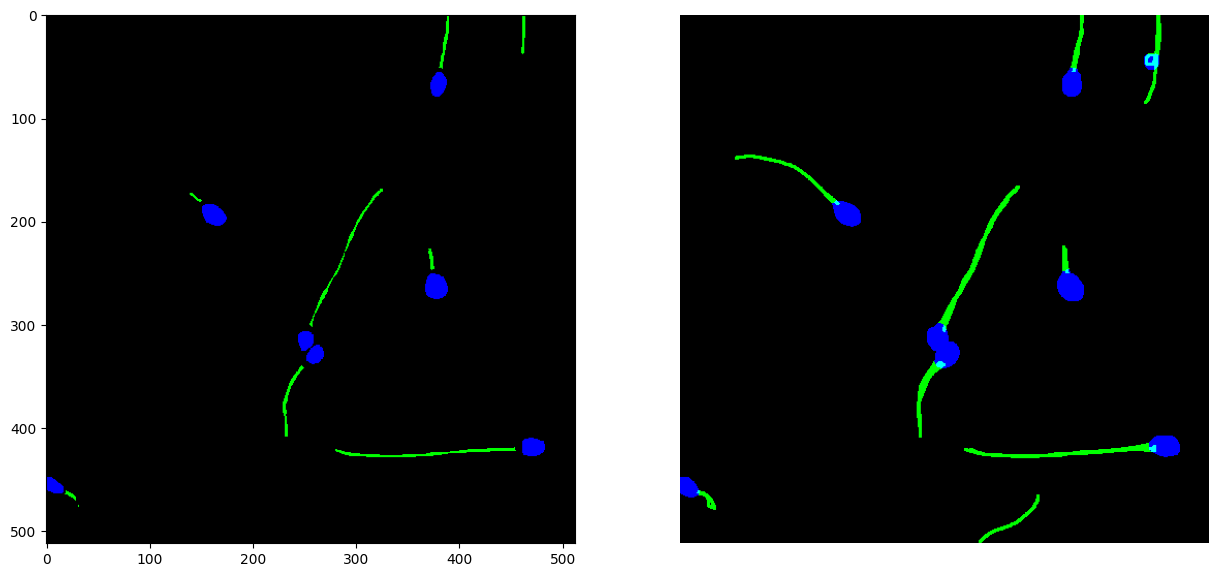

In [65]:
import cv2
from skimage.transform import resize
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
from utils.augmentation import MyAugmentation
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt
import random

def rgb_to_class_id(mask_rgb, class_colors):
        mask_id = np.zeros(mask_rgb.shape[:2], dtype=np.float32)
        for class_id, color in enumerate(class_colors):
            idx = class_id
            if class_id == 3:
                idx = 1
            mask_id[(mask_rgb == color).all(axis=2)] = idx
        return mask_id

class_colors = [[0, 0, 0], [0, 255, 0], [0, 0, 255],[0,255,255]]  # tło, wić, główka
number = random.randint(0, 431)
print(f'Number = {number}')

img = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/images/{number}.png')
x_img = img.astype(np.float32)
x_img = resize(x_img, (512, 512, 3), mode='constant', preserve_range=True)

min_val = np.min(x_img)
max_val = np.max(x_img)
x_img = (x_img - min_val) / (max_val - min_val)
        
# Load masks
#GT1_mixed
mask1 = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/GT1_mixed/{number}.png')
mask1 = mask1.astype(np.float32)
mask1 = resize(mask1, (512, 512, 3), mode='constant', preserve_range=True)
mask_id_1 = rgb_to_class_id(mask1, class_colors)
#GT2_mixed
mask2 = cv2.imread(f'/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train/GT2_mixed/{number}.png')
mask2 = mask2.astype(np.float32)
mask2 = resize(mask2, (512, 512, 3), mode='constant', preserve_range=True)
mask_id_2 = rgb_to_class_id(mask2, class_colors)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(mask_id_1)
plt.subplot(1,2,2)
plt.imshow(mask_id_2)
plt.axis('off')


intersection = cv2.bitwise_and(mask1, mask2)
union = cv2.bitwise_or(mask1, mask2)

intersection_id = rgb_to_class_id(intersection, class_colors)
union_id = rgb_to_class_id(union, class_colors)


colors = [[0, 0, 0], [0, 255, 0], [255, 0, 0]]  # tło, wić, główka
# Utwórz obraz RGB z maski
mask_to_display = intersection_id
intersection_rgb = np.zeros((mask_to_display.shape[0], mask_to_display.shape[1], 3), dtype=np.uint8)
for i, color in enumerate(colors):
    intersection_rgb[mask_to_display == i] = color

mask_to_display = union_id
union_rgb = np.zeros((mask_to_display.shape[0], mask_to_display.shape[1], 3), dtype=np.uint8)
for i, color in enumerate(colors):
    union_rgb[mask_to_display == i] = color
    

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(intersection_rgb)
plt.subplot(1,2,2)
plt.imshow(union_rgb)
plt.axis('off')


plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(intersection)
plt.subplot(1,2,2)
plt.imshow(union)
plt.axis('off')


